In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("study_performance.csv")

In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Question 1: Ethnicity and Achievement & Parental Education Impact

Predicted Math Scores:
Parental Education: 6, Predicted Math Score: 61.943287965724494
Parental Education: 7, Predicted Math Score: 60.69118526736282

Predicted Reading Scores:
Parental Education: 6, Predicted Reading Score: 65.05695426400013
Parental Education: 7, Predicted Reading Score: 63.81501958082288

Predicted Writing Scores:
Parental Education: 6, Predicted Writing Score: 62.31486836328403
Parental Education: 7, Predicted Writing Score: 60.581515407465254


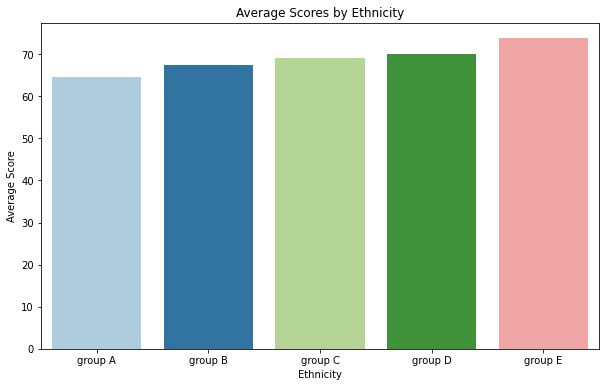

In [14]:
if data['parental_level_of_education'].dtype == 'object':
    data['parental_level_of_education'] = pd.factorize(data['parental_level_of_education'])[0]

X = data['parental_level_of_education'].values.reshape(-1, 1)

math_model = LinearRegression()
math_model.fit(X, data['math_score'])

reading_model = LinearRegression()
reading_model.fit(X, data['reading_score'])

writing_model = LinearRegression()
writing_model.fit(X, data['writing_score'])

new_parental_education = np.array([6, 7]).reshape(-1, 1)
predicted_math_scores = math_model.predict(new_parental_education)
predicted_reading_scores = reading_model.predict(new_parental_education)
predicted_writing_scores = writing_model.predict(new_parental_education)

print("Predicted Math Scores:")
for education, score in zip(new_parental_education, predicted_math_scores):
    print(f"Parental Education: {education[0]}, Predicted Math Score: {score}")

print("\nPredicted Reading Scores:")
for education, score in zip(new_parental_education, predicted_reading_scores):
    print(f"Parental Education: {education[0]}, Predicted Reading Score: {score}")

print("\nPredicted Writing Scores:")
for education, score in zip(new_parental_education, predicted_writing_scores):
    print(f"Parental Education: {education[0]}, Predicted Writing Score: {score}")

grouped_vars = data.groupby("race_ethnicity")[["math_score", "reading_score", "writing_score"]].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_vars.index, y="math_score", data=grouped_vars, label="Math", palette='Paired')
sns.barplot(x=grouped_vars.index, y="reading_score", data=grouped_vars, label="Reading", palette='Paired')
sns.barplot(x=grouped_vars.index, y="writing_score", data=grouped_vars, label="Writing", palette='Paired')

plt.xlabel("Ethnicity")
plt.ylabel("Average Score")
plt.title("Average Scores by Ethnicity")

plt.show()

# Question 2: Test Prep Effectiveness


Boxplots of Scores by parental_level_of_education:


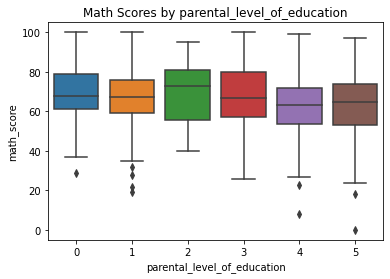

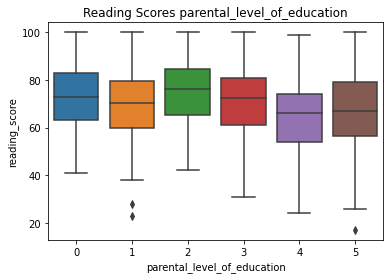

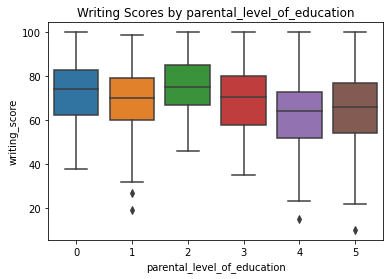

Average Completed Preparation Course:
math_score       69.695531
reading_score    73.893855
writing_score    74.418994
dtype: float64
Average for No Preparation Course:
math_score       64.077882
reading_score    66.534268
writing_score    64.504673
dtype: float64

Difference in Average of scores:
math_score       5.617649
reading_score    7.359587
writing_score    9.914322
dtype: float64


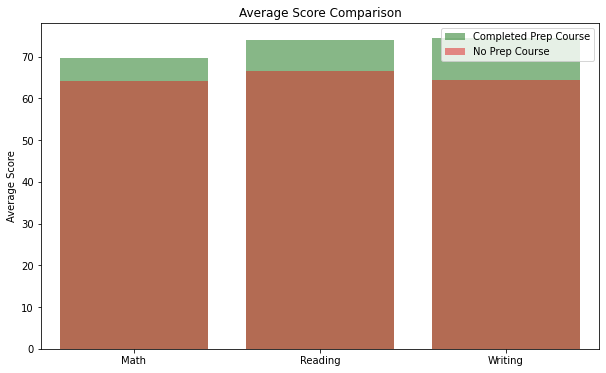

In [20]:
print("\nBoxplots of Scores by parental_level_of_education:")
sns.boxplot( x = "parental_level_of_education", y = "math_score",data=data )
plt.title("Math Scores by parental_level_of_education")
plt.show()
sns.boxplot(x = "parental_level_of_education", y = "reading_score",data=data )
plt.title("Reading Scores parental_level_of_education")
plt.show()
sns.boxplot(x = "parental_level_of_education", y = "writing_score",data=data)
plt.title("Writing Scores by parental_level_of_education")
plt.show()

completed_avg = data[data['test_preparation_course'] == 'completed'][['math_score', 'reading_score', 'writing_score']].mean()
none_avg = data[data['test_preparation_course'] == 'none'][['math_score', 'reading_score', 'writing_score']].mean()

print("Average Completed Preparation Course:")
print(completed_avg)
print("Average for No Preparation Course:")
print(none_avg)

diff = completed_avg - none_avg

print("\nDifference in Average of scores:")
print(diff)

plt.figure(figsize=(10, 6))
sns.barplot(x=['Math', 'Reading', 'Writing'], y=completed_avg, color='green', label='Completed Prep Course', alpha=0.5)
sns.barplot(x=['Math', 'Reading', 'Writing'], y=none_avg, color='red', label='No Prep Course', alpha=0.5)
plt.title('Average Score Comparison')
plt.ylabel('Average Score')
plt.legend()
plt.show()

# Question 3: Lunch and Test Performance 

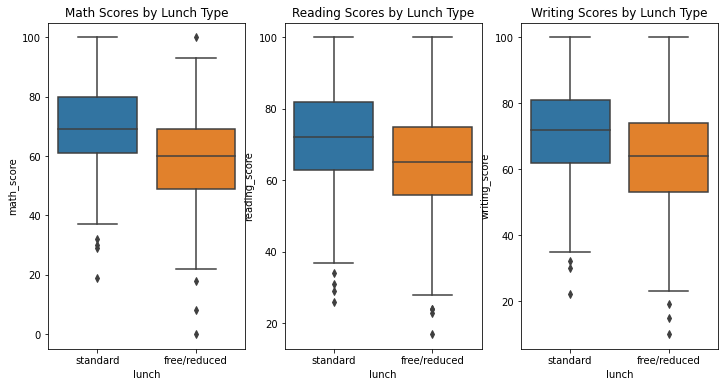

In [11]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math_score', data=data)
plt.title('Math Scores by Lunch Type')

plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading_score', data=data)
plt.title('Reading Scores by Lunch Type')

plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='writing_score', data=data)
plt.title('Writing Scores by Lunch Type')

plt.show()

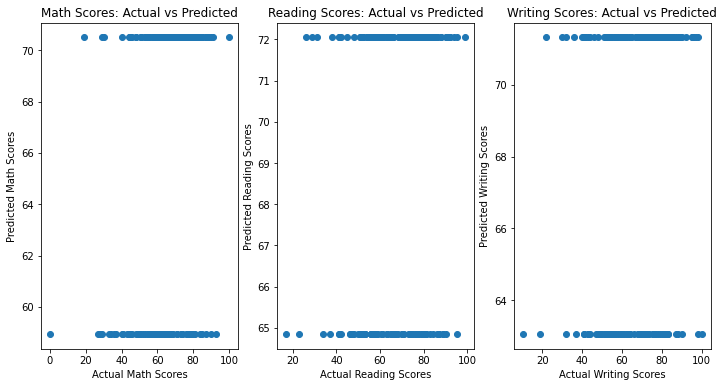

(800, 1) (200, 1) (800,) (200,)
Math Model Coefficient: [11.54937151]
Reading Model Coefficient: [7.1994257]
Writing Model Coefficient: [8.26324799]


In [12]:
data['lunch'] = data['lunch'].map({'standard': 1, 'free/reduced': 0})

X = data[['lunch']]
y_math = data['math_score']
y_reading = data['reading_score']
y_writing = data['writing_score']

X_train, X_test, y_math_train, y_math_test = train_test_split(X, y_math, test_size=0.2, random_state=42)
X_train, X_test, y_reading_train, y_reading_test = train_test_split(X, y_reading, test_size=0.2, random_state=42)
X_train, X_test, y_writing_train, y_writing_test = train_test_split(X, y_writing, test_size=0.2, random_state=42)

math_model = LinearRegression()
math_model.fit(X_train, y_math_train)

reading_model = LinearRegression()
reading_model.fit(X_train, y_reading_train)

writing_model = LinearRegression()
writing_model.fit(X_train, y_writing_train)

predicted_math_scores = math_model.predict(X_test)
predicted_reading_scores = reading_model.predict(X_test)
predicted_writing_scores = writing_model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_math_test, predicted_math_scores)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Math Scores: Actual vs Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_reading_test, predicted_reading_scores)
plt.xlabel('Actual Reading Scores')
plt.ylabel('Predicted Reading Scores')
plt.title('Reading Scores: Actual vs Predicted')

plt.subplot(1, 3, 3)
plt.scatter(y_writing_test, predicted_writing_scores)
plt.xlabel('Actual Writing Scores')
plt.ylabel('Predicted Writing Scores')
plt.title('Writing Scores: Actual vs Predicted')

plt.show()

print(X_train.shape, X_test.shape, y_math_train.shape, y_math_test.shape)
print("Math Model Coefficient:", math_model.coef_)
print("Reading Model Coefficient:", reading_model.coef_)
print("Writing Model Coefficient:", writing_model.coef_)


# Question 4: Gender Gap

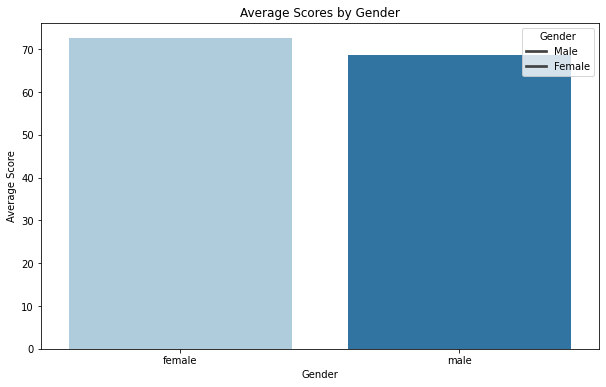

        math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


In [13]:
average_scores = data.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_scores, x=average_scores.index, y='math_score', palette='Paired', label='Math')
sns.barplot(data=average_scores, x=average_scores.index, y='reading_score', palette='Paired', label='Reading')
sns.barplot(data=average_scores, x=average_scores.index, y='writing_score', palette='Paired', label='Writing')

plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()
print(average_scores)

# Question 5: Subject Correlations


Correlations between Subjects:
               math_score  reading_score  writing_score
math_score       1.000000       0.817580       0.802642
reading_score    0.817580       1.000000       0.954598
writing_score    0.802642       0.954598       1.000000


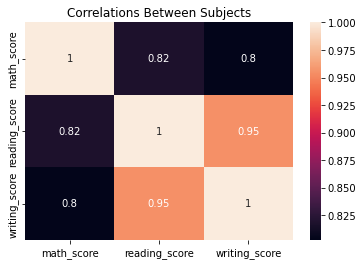

Descriptive Statistics by Subject:

Subject: math_score
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

Subject: reading_score
count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

Subject: writing_score
count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64


In [15]:
correlations = data[['math_score', 'reading_score', 'writing_score']].corr()
print("\nCorrelations between Subjects:")
print(correlations)

sns.heatmap(correlations, annot=True)
plt.title("Correlations Between Subjects")
plt.show()

print("Descriptive Statistics by Subject:")
for subject in ["math_score", "reading_score", "writing_score"]:

  description = data[subject].describe()
  print(f"\nSubject: {subject}")

  print(description)

# Question 6: Statistics and Boxplot Analysis


Boxplots of Scores by Ethnicity:


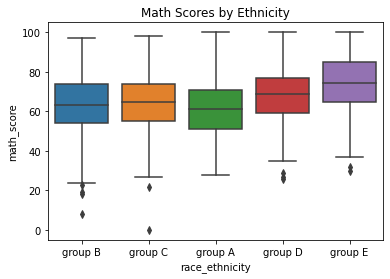

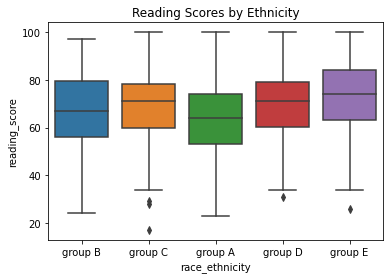

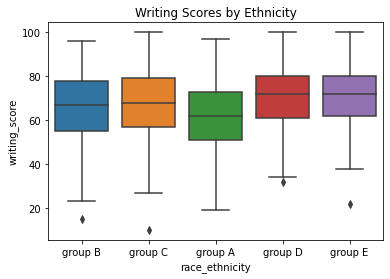

In [16]:
print("\nBoxplots of Scores by Ethnicity:")
sns.boxplot( x = "race_ethnicity", y = "math_score",data=data )
plt.title("Math Scores by Ethnicity")
plt.show()
sns.boxplot(x = "race_ethnicity", y = "reading_score", data=data )
plt.title("Reading Scores by Ethnicity")
plt.show()
sns.boxplot(x = "race_ethnicity", y = "writing_score", data=data)
plt.title("Writing Scores by Ethnicity")
plt.show()

# Question 7: Test Performance by Gender


Boxplots of Scores by gender:


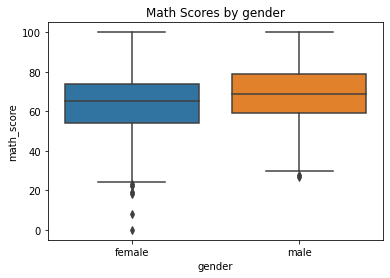

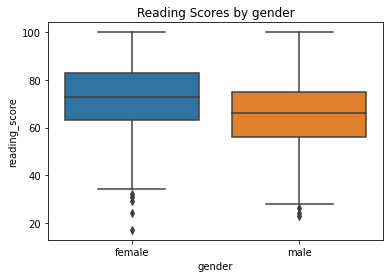

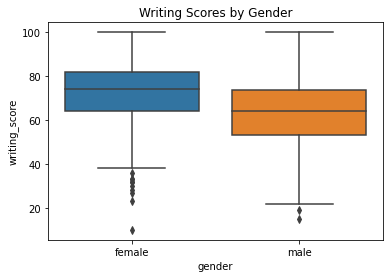

In [17]:
print("\nBoxplots of Scores by gender:")
sns.boxplot( x = "gender", y = "math_score",data=data )
plt.title("Math Scores by gender")
plt.show()
sns.boxplot(x = "gender", y = "reading_score",data=data )
plt.title("Reading Scores by gender")
plt.show()
sns.boxplot(x = "gender", y = "writing_score",data=data)
plt.title("Writing Scores by Gender")
plt.show()


Boxplots of Scores by gender:


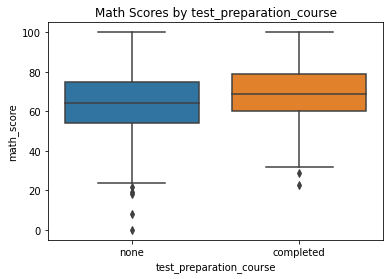

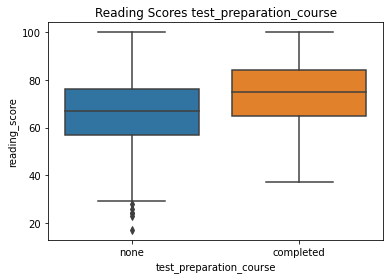

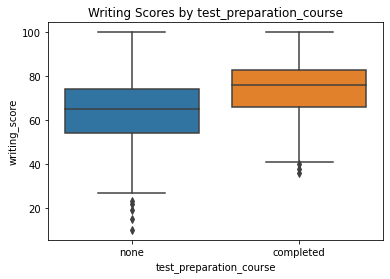

In [18]:
print("\nBoxplots of Scores by gender:")
sns.boxplot( x = "test_preparation_course", y = "math_score",data=data )
plt.title("Math Scores by test_preparation_course")
plt.show()
sns.boxplot(x = "test_preparation_course", y = "reading_score",data=data )
plt.title("Reading Scores test_preparation_course")
plt.show()
sns.boxplot(x = "test_preparation_course", y = "writing_score",data=data)
plt.title("Writing Scores by test_preparation_course")
plt.show()


Boxplots of Scores by lunch:


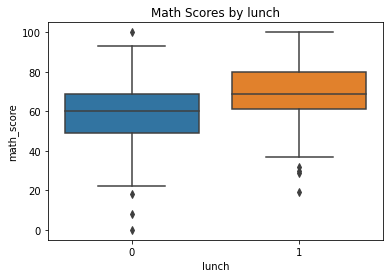

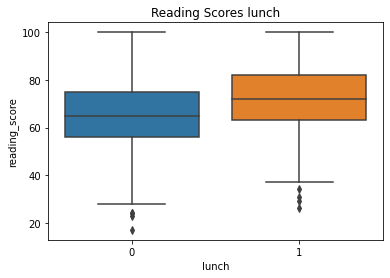

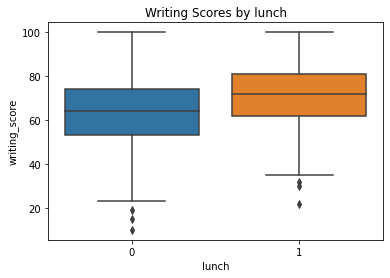

In [19]:
print("\nBoxplots of Scores by lunch:")
sns.boxplot( x = "lunch", y = "math_score",data=data )
plt.title("Math Scores by lunch")
plt.show()
sns.boxplot(x = "lunch", y = "reading_score",data=data )
plt.title("Reading Scores lunch")
plt.show()
sns.boxplot(x = "lunch", y = "writing_score",data=data)
plt.title("Writing Scores by lunch")
plt.show()